In [1]:
%matplotlib inline

# EnsembleVoteClassifier: A majority voting classifier

Implementation of a majority voting `EnsembleVoteClassifier` for classification.

> from mlxtend.classifier import EnsembleVoteClassifier

# Overview

The `EnsembleVoteClassifier` is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting. (For simplicity, we will refer to both majority and plurality voting as majority voting.)


![](./EnsembleVoteClassifier_files/voting.png)


The `EnsembleVoteClassifier` implements "hard" and "soft" voting. In hard voting, we predict the final class label as the class label that has been predicted most frequently by the classification models. In soft voting, we predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

![](./EnsembleVoteClassifier_files/majority_voting.png)



**Note**

If you are interested in using the <code>EnsembleVoteClassifier</code>, please note that it is now also available through scikit learn (>0.17) as <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html"><code>VotingClassifier</code></a>.

### Majority Voting / Hard Voting

Hard voting is the simplest case of majority voting. Here, we predict the class label $\hat{y}$ via majority (plurality) voting of each classifier $C_j$:

$$\hat{y}=mode\{C_1(\mathbf{x}), C_2(\mathbf{x}), ..., C_m(\mathbf{x})\}$$





Assuming that we combine three classifiers that classify a training sample as follows:

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

$$\hat{y}=mode\{0, 0, 1\} = 0$$

Via majority vote, we would we would classify the sample as "class 0."

### Weighted Majority Vote

In addition to the simple majority vote (hard voting) as described in the previous section, we can compute a weighted majority vote by associating a weight $w_j$ with classifier $C_j$:

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j \chi_A \big(C_j(\mathbf{x})=i\big),$$

where $\chi_A$ is the characteristic function $[C_j(\mathbf{x}) = i \; \in A]$, and $A$ is the set of unique class labels. 

Continuing with the example from the previous section

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

assigning the weights \{0.2, 0.2, 0.6\} would yield a prediction $\hat{y} = 1$:

$$\arg \max_i [0.2 \times i_0 + 0.2 \times i_0 + 0.6 \times i_1] = 1$$

### Soft Voting

In soft voting, we predict the class labels based on the predicted probabilities $p$ for classifier -- this approach is only recommended if the classifiers are well-calibrated.

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j p_{ij},$$

where $w_j$ is the weight that can be assigned to the $j$th classifier.

Assuming the example in the previous section was a binary classification task with class labels $i \in \{0, 1\}$, our ensemble could make the following prediction:

- $C_1(\mathbf{x}) \rightarrow [0.9, 0.1]$
- $C_2(\mathbf{x}) \rightarrow [0.8, 0.2]$
- $C_3(\mathbf{x}) \rightarrow [0.4, 0.6]$

Using uniform weights, we compute the average probabilities:

$$p(i_0 \mid \mathbf{x}) = \frac{0.9 + 0.8 + 0.4}{3} = 0.7 \\\\
p(i_1 \mid \mathbf{x}) = \frac{0.1 + 0.2 + 0.6}{3} = 0.3$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 0$$

However, assigning the weights \{0.1, 0.1, 0.8\} would yield a prediction $\hat{y} = 1$:
    
$$p(i_0 \mid \mathbf{x}) = {0.1 \times 0.9 + 0.1 \times 0.8 + 0.8 \times  0.4} = 0.49 \\\\
p(i_1 \mid \mathbf{x}) = {0.1 \times 0.1 + 0.2 \times 0.1 + 0.8 \times 0.6} = 0.51$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 1$$

### References


- [1] S. Raschka. [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book). Packt Publishing Ltd., 2015.

## Example 1 -  Classifying Iris Flowers Using Different Classification Models

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [3]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [4]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


#### Plotting Decision Regions

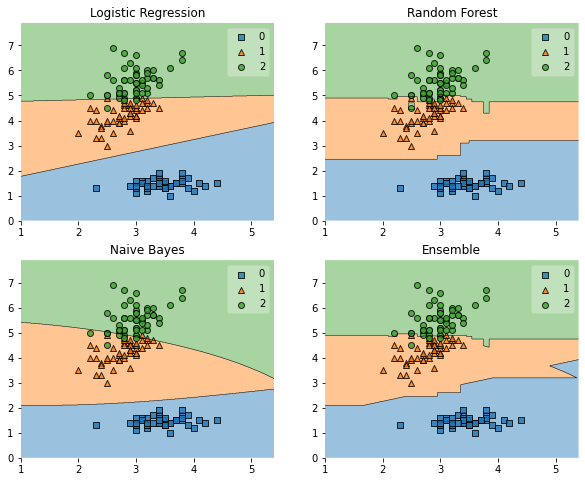

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

## Example 2 - Grid Search

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [7]:
%%capture --no-display

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(iris.data, iris.target)
    
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

**Note**: If the `EnsembleClassifier` is initialized with multiple similar estimator objects, the estimator names are modified with consecutive integer indices, for example:

In [8]:
%%capture --no-display

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf1, clf2], 
                              voting='soft')

params = {'logisticregression-1__C': [1.0, 100.0],
          'logisticregression-2__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

**Note**

The `EnsembleVoteClass` also enables grid search over the `clfs` argument. However, due to the current implementation of `GridSearchCV` in scikit-learn, it is not possible to search over both, differenct classifiers and classifier parameters at the same time. For instance, while the following parameter dictionary works

    params = {'randomforestclassifier__n_estimators': [1, 100],
    'clfs': [(clf1, clf1, clf1), (clf2, clf3)]}
    
it will use the instance settings of `clf1`, `clf2`, and `clf3` and not overwrite it with the `'n_estimators'` settings from `'randomforestclassifier__n_estimators': [1, 100]`.

## Example 3 - Majority voting with classifiers trained on different feature subsets

Feature selection algorithms implemented in scikit-learn as well as the `SequentialFeatureSelector` implement a `transform` method that passes the reduced feature subset to the next item in a `Pipeline`.

For example, the method

    def transform(self, X):
        return X[:, self.k_feature_idx_]
        
returns the best feature columns, `k_feature_idx_`, given a dataset X.

Thus, we simply need to construct a `Pipeline` consisting of the feature selector and the classifier in order to select different feature subsets for different algorithms. During `fitting`, the optimal feature subsets are automatically determined via the `GridSearchCV` object, and by calling `predict`, the fitted feature selector in the pipeline only passes these columns along, which resulted in the best performance for the respective classifier.

In [9]:
%%capture --no-display

from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, :], iris.target

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# Creating a feature-selection-classifier pipeline

sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=4,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=0,
                                 cv=0)

clf1_pipe = Pipeline([('sfs', sfs1),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')


params = {'pipeline__sfs__k_features': [1, 2, 3],
          'pipeline__logreg__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(iris.data, iris.target)



cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

The best parameters determined via GridSearch are:

In [10]:
grid.best_params_

{'pipeline__logreg__C': 1.0,
 'pipeline__sfs__k_features': 2,
 'randomforestclassifier__n_estimators': 200}

Now, we assign these parameters to the ensemble voting classifier, fit the models on the complete training set, and perform a prediction on 3 samples from the Iris dataset.

In [11]:
eclf = eclf.set_params(**grid.best_params_)
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

#### Manual Approach

Alternatively, we can select different columns "manually" using the `ColumnSelector` object. In this example, we select only the first (sepal length) and third (petal length) column for the logistic regression classifier (`clf1`).

In [12]:
from mlxtend.feature_selection import ColumnSelector


col_sel = ColumnSelector(cols=[0, 2])

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3],
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

Furthermore, we can fit the `SequentialFeatureSelector` separately, outside the grid search hyperparameter optimization pipeline. Here, we determine the best features first, and then we construct a pipeline using these "fixed," best features as seed for the `ColumnSelector`:

In [13]:
sfs1 = SequentialFeatureSelector(clf1, 
                                 k_features=2,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=1,
                                 cv=0)

sfs1.fit(X, y)

print('Best features', sfs1.k_feature_idx_)

col_sel = ColumnSelector(cols=sfs1.k_feature_idx_)

clf1_pipe = Pipeline([('sel', col_sel),
                      ('logreg', clf1)])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 1/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 2/2

Best features (2, 3)


In [14]:
eclf = EnsembleVoteClassifier(clfs=[clf1_pipe, clf2, clf3], 
                              voting='soft')
eclf.fit(X, y).predict(X[[1, 51, 149]])

array([0, 1, 2])

## Example 5 - Using Pre-fitted Classifiers

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

Assume that we previously fitted our classifiers:

In [16]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

for clf in (clf1, clf2, clf3):
    clf.fit(X, y)

By setting `fit_base_estimators=False`, it will enforce `use_clones` to be False and the `EnsembleVoteClassifier` will not re-fit these classifers to save computational time:

In [17]:
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1], fit_base_estimators=False)

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']

eclf.fit(X, y)

print('accuracy:', np.mean(y == eclf.predict(X)))

accuracy: 0.96


/Users/sebastian/miniforge3/lib/python3.9/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


However, please note that `fit_base_estimators=False` is incompatible to any form of cross-validation that is done in e.g., `model_selection.cross_val_score` or `model_selection.GridSearchCV`, etc., since it would require the classifiers to be refit to the training folds. Thus, only use `fit_base_estimators=False` if you want to make a prediction directly without cross-validation.

## Example 6 - Ensembles of Classifiers that Operate on Different Feature Subsets

If desired, the different classifiers can be fit to different subsets of features in the training dataset. The following example illustrates how this can be done on a technical level using scikit-learn pipelines and the `ColumnSelector`:

In [18]:
from sklearn.datasets import load_iris
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2])

eclf.fit(X, y)

EnsembleVoteClassifier(clfs=[Pipeline(steps=[('columnselector',
                                              ColumnSelector(cols=(0, 2))),
                                             ('logisticregression',
                                              LogisticRegression())]),
                             Pipeline(steps=[('columnselector',
                                              ColumnSelector(cols=(1, 2, 3))),
                                             ('logisticregression',
                                              LogisticRegression())])])

## Example 7 - A Note about Scikit-Learn SVMs and Soft Voting

This section provides some additional technical insights in how probabilities are used when `voting='soft'`. 


Note that scikit-learn estimates the probabilities for SVMs (more info here: http://scikit-learn.org/stable/modules/svm.html#scores-probabilities) in a way that these may not be consistent with the class labels that the SVM predicts. This is an extreme example, but let's say we have a dataset with 3 class labels, 0, 1, and 2. For a given training example, the SVM classifier may predict class 2. However, the class-membership probabilities may look as follows:

- class 0: 99%
- class 1: 0.5%
- class 2: 0.5%

A practical example of this scenario is shown below:

In [19]:
import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

clf2 = SVC(probability=True, random_state=4)
clf2.fit(X, y)
eclf = EnsembleVoteClassifier(clfs=[clf2], voting='soft', fit_base_estimators=False)
eclf.fit(X, y)

for svm_class, e_class, svm_prob, e_prob, in zip(clf2.predict(X),
                                                 eclf.predict(X),
                                                 clf2.predict_proba(X),
                                                 eclf.predict_proba(X)):
    if svm_class != e_class:
        print('============')
        print('Probas from SVM            :', svm_prob)
        print('Class from SVM             :', svm_class)
        print('Probas from SVM in Ensemble:', e_prob)
        print('Class from SVM in Ensemble :', e_class)
        print('============')

Probas from SVM            : [0.00921708 0.49415165 0.49663127]
Class from SVM             : 1
Probas from SVM in Ensemble: [0.00921708 0.49415165 0.49663127]
Class from SVM in Ensemble : 2


/Users/sebastian/miniforge3/lib/python3.9/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


## Example 7 - A Note about Scikit-Learn SVMs and Soft VotingBased on the probabilities, we would expect the SVM to predict class 2, because it has the highest probability. Since the `EnsembleVoteClassifier` uses the `argmax` function internally if `voting='soft'`, it would indeed predict class 2 in this case even if the ensemble consists of only one SVM model.

Note that in practice, this minor technical detail does not need to concern you, but it is useful to keep it in mind in case you are wondering about results from a 1-model SVM ensemble compared to that SVM alone -- this is not a bug.

## Example 8 - Optimizing Ensemble Weights with Nelder-Mead

In this section, we will see how we can use a heuristic search method like [Nelder-Mead](https://en.wikipedia.org/wiki/Nelder–Mead_method) for optimizing the ensemble weights.

Suppose we have the following example scenario where we fit 3 individual classifiers on different subsets of the training dataset:

In [20]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import mnist_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X, y = mnist_data()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, shuffle=True, random_state=1
)

clf1 = GaussianNB()
clf2 = LogisticRegression(random_state=123, solver='newton-cg')
clf3 = DecisionTreeClassifier(random_state=123, max_depth=2)

clf1.fit(X_train[500:1000], y_train[500:1000])
clf2.fit(X_train[750:1250], y_train[750:1250])
clf3.fit(X_train[1250:2000], y_train[1250:2000]);

Then, we construct the an ensemble classifier from these 3 classifiers where each classifier contributes equally with weight 1:

In [21]:
eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="soft",  # the same would also work with "hard" voting
    weights=(1, 1, 1),
    use_clones=False,
    fit_base_estimators=False,
)
eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

/Users/sebastian/miniforge3/lib/python3.9/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


0.8012

We see that we reach 80% accuracy on the validation set. Can we do better? Maybe they indvidual classifiers shouldn't be contributing equally. Perhaps, we can use an optimization algorothm from `scipy.optimize` to find a better relative weighting of these individual classifiers.

Let's set up an objective function that we want to minimize via SciPy's [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [22]:
from scipy.optimize import minimize


def function_to_minimize(weights, fitted_clfs):

    w1, w2 = weights  # these are the new weights!

    newclf = EnsembleVoteClassifier(
        voting="soft",
        use_clones=False,
        fit_base_estimators=False,
        clfs=fitted_clfs,
        weights=(w1, w2, 1.),  # use the new weights
    )

    newclf.fit(X_train, y_train)
    score = newclf.score(X_val, y_val)

    # change accuracy to error so that smaller is better
    score_to_minimize = 1 - score

    return score_to_minimize

Note a few things:

1. We only optimize 2 out of the 3 classifier weigths. That's because the weighting is relative to each other, and it would be overkill (and too many degrees of freedom) to also optimize weight 3.

2. We set `use_clones=False & fit_base_estimators=False` as before, this is to make sure that we use the prefit classifiers in the ensemble classifier.

3. Instead of optimizing the accuracy, we optimize the the classification error, `score_to_minimize = 1 - score`. That's because we use the `minimize` function where lower means better.

Next, let's choose some initial weight values and run the optimization. Via the `bounds` we specify the range (lower and upper value) for each weight so that the search doesn't go crazy:

In [23]:
%%capture --no-display

init_weights = [1., 1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((clf1, clf2, clf3),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

Let's look at the results!

In [24]:
print(results)

 final_simplex: (array([[0.575     , 1.40625   ],
       [0.57500153, 1.40622215],
       [0.57508965, 1.40617647]]), array([0.1324, 0.1324, 0.1324]))
           fun: 0.13239999999999996
       message: 'Optimization terminated successfully.'
          nfev: 60
           nit: 21
        status: 0
       success: True
             x: array([0.575  , 1.40625])


It looks like the search was successful and returned the following weights:

In [25]:
solution = results["x"]
print(solution)

[0.575   1.40625]


Let's use these new weights in our ensemble classifier:

In [26]:
eclf = EnsembleVoteClassifier(
    clfs=(clf1, clf2, clf3),
    voting="soft",
    weights=(solution[0], solution[1], 1),
    use_clones=False,
    fit_base_estimators=False,
)

eclf.fit(X_train, y_train)
eclf.score(X_val, y_val)

/Users/sebastian/miniforge3/lib/python3.9/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


0.8676

As we can see, the results on the validation set (0.8676) improved compared to the original ones (0.8012). Yay!

# API

In [27]:
with open('../../api_modules/mlxtend.classifier/EnsembleVoteClassifier.md', 'r') as f:
    print(f.read())

## EnsembleVoteClassifier

*EnsembleVoteClassifier(clfs, voting='hard', weights=None, verbose=0, use_clones=True, fit_base_estimators=True)*

Soft Voting/Majority Rule classifier for scikit-learn estimators.

**Parameters**

- `clfs` : array-like, shape = [n_classifiers]

    A list of classifiers.
    Invoking the `fit` method on the `VotingClassifier` will fit clones
    of those original classifiers
    be stored in the class attribute
    if `use_clones=True` (default) and
    `fit_base_estimators=True` (default).

- `voting` : str, {'hard', 'soft'} (default='hard')

    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probalities, which is recommended for
    an ensemble of well-calibrated classifiers.

- `weights` : array-like, shape = [n_classifiers], optional (default=`None`)

    Sequence of weights (`float` or `int`) to weight the occurances of
    predicted class